### Handling Outliers

Install and import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load and Explore the Dataset

In [ ]:
file_path = r'D:\New folder (4)\Coursera\DA Capstone\cleaned_survey_data2.csv'

dfo = pd.read_csv(file_path)

dfo.head()    # Display the first five rows

,Unnamed: 0,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange,Language
0,0,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,...,0.0,15.0,0.0,0.0,Appropriate in length,Easy,66616.0,8.0,5-10,JavaScript
1,1,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,...,0.0,15.0,0.0,0.0,Appropriate in length,Easy,66616.0,8.0,5-10,Python
2,2,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,...,0.0,15.0,0.0,0.0,Appropriate in length,Easy,66616.0,8.0,5-10,Ruby
3,3,13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,...,0.0,20.0,10.0,10.0,Appropriate in length,Easy,66616.0,8.0,10-20,Bash/Shell (all shells)
4,4,13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,...,0.0,20.0,10.0,10.0,Appropriate in length,Easy,66616.0,8.0,10-20,C#


In [3]:
df = dfo.copy()

##### Plot the Distribution of Industry

Explore how respondents are distributed across different industries.

* Plot a bar chart to visualize the distribution of respondents by industry.

* Highlight any notable trends.

In [4]:
df['Industry'].sample(5)

140762                          Other:
22310                       Healthcare
5840        Banking/Financial Services
152756    Media & Advertising Services
144754                          Energy
Name: Industry, dtype: object

In [5]:
# Check for Null Values
df['Industry'].isnull().sum()

0

In [6]:
df['Industry'].value_counts()

Industry
Software Development                          66297
Other:                                        16441
Internet, Telecomm or Information Services     8724
Fintech                                        8467
Manufacturing                                  6967
Healthcare                                     6894
Banking/Financial Services                     6860
Retail and Consumer Services                   6530
Government                                     5415
Higher Education                               5153
Computer Systems Design and Services           5024
Media & Advertising Services                   4728
Transportation, or Supply Chain                4597
Energy                                         2988
Insurance                                      1992
Name: count, dtype: int64

C:\Users\shubh\AppData\Local\Temp\ipykernel_9132\832352948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['Industry'].value_counts().index, x=df['Industry'].value_counts().values, palette='pastel')


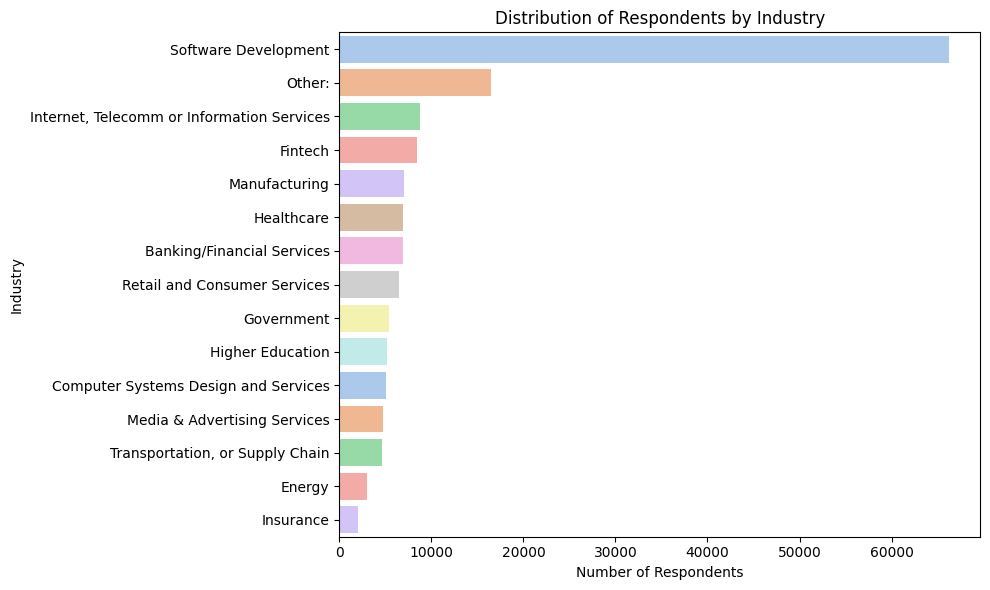

In [7]:
# Barplot

plt.figure(figsize=(10, 6))
sns.barplot(y=df['Industry'].value_counts().index, x=df['Industry'].value_counts().values, palette='pastel')

plt.title('Distribution of Respondents by Industry')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()


* _Software Development_ dominates the field, accounting for over half of all respondents — expected due to the nature of tech surveys.

* _Fintech_, _telecom_, and _internet services_ collectively make up a significant portion, reflecting growing digital economies.

* _Healthcare_, _manufacturing_, and _finance_ have strong showings, indicating widespread application of tech beyond just core software.

* "_Other_" is the second-largest group, which might need further breakdown for more granularity.

* _Insurance_, _energy_, and _transport_/_supply chain_ trail behind, suggesting fewer developer respondents from these traditional sectors.

##### Identify High Compensation Outliers

Identify respondents with extremely high yearly compensation.

* Calculate basic statistics (mean, median, and standard deviation) for ConvertedCompYearly.

* Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).

In [8]:
# Basic statistics

df['ConvertedCompYearly'].describe()

count    1.570770e+05
mean     7.752111e+04
std      1.283562e+05
min      1.000000e+00
25%      6.107100e+04
50%      6.661600e+04
75%      7.384200e+04
max      1.381802e+07
Name: ConvertedCompYearly, dtype: float64

In [9]:
# Use 3 standard deviations above the mean as a typical outlier threshold

threshold = df['ConvertedCompYearly'].mean() + 3 * df['ConvertedCompYearly'].median()
print(f"Outlier Threshold: {threshold:.2f}")

Outlier Threshold: 277369.11


In [10]:
# Identify Outliers

outliers = df[df['ConvertedCompYearly'] > threshold]
print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 1770


In [11]:
# Top few outliers
outliers[['Country', 'Employment', 'ConvertedCompYearly']].sort_values(by='ConvertedCompYearly', ascending=False).head()

,Country,Employment,ConvertedCompYearly
36899,South Africa,"Employed, full-time;Independent contractor, fr...",13818022.0
36894,South Africa,"Employed, full-time;Independent contractor, fr...",13818022.0
36900,South Africa,"Employed, full-time;Independent contractor, fr...",13818022.0
36898,South Africa,"Employed, full-time;Independent contractor, fr...",13818022.0
36896,South Africa,"Employed, full-time;Independent contractor, fr...",13818022.0


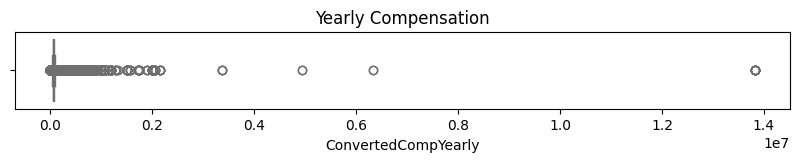

In [12]:
# Box Plot

plt.figure(figsize=(10, 1))
sns.boxplot(x=df['ConvertedCompYearly'], color='skyblue')
plt.title('Yearly Compensation')
plt.show()

##### Detect Outliers in Compensation

Identify outliers in the `ConvertedCompYearly` column using the IQR method.

* Calculate the Interquartile Range (IQR).
   - $IQR = Q3 - Q1$

* Determine the upper and lower bounds for outliers.

* Count and visualize outliers using a box plot.

In [13]:
# Calculate the IQR

Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

Q1: 61071.00
Q3: 73842.00
IQR: 12771.00


In [14]:
# Define Bounds for Outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

Lower Bound: 41914.50
Upper Bound: 92998.50


In [15]:
# Identify and Count Outliers

outliers_iqr = df[(df['ConvertedCompYearly'] <= lower_bound) | (df['ConvertedCompYearly'] >= upper_bound)]
print(f"Number of Outliers Detected: {len(outliers_iqr)}")

Number of Outliers Detected: 55113


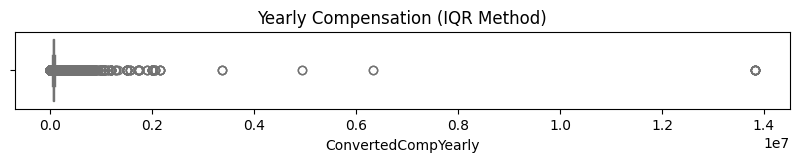

In [16]:
# Visualize with a Box Plot

plt.figure(figsize=(10, 1))
sns.boxplot(x=df['ConvertedCompYearly'], color='lightgreen')
plt.title('Yearly Compensation (IQR Method)')
plt.show()

##### Remove Outliers and Create a New DataFrame

Remove outliers from the dataset.

* Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.

* Validate the size of the new DataFrame.

In [17]:
# Filter Out Outliers in a new df

df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

In [18]:
# Validate New DataFrame Size

print(f"Original size: {df.shape[0]} rows")
print(f"Cleaned size: {df_no_outliers.shape[0]} rows")
print(f"Removed outliers: {df.shape[0] - df_no_outliers.shape[0]} rows")

Original size: 157077 rows
Cleaned size: 101964 rows
Removed outliers: 55113 rows


##### Correlation Analysis

Analyze the correlation between `Age` (transformed) and other numerical columns.

* Map the `Age` column to approximate numeric values.

* Compute correlations between `Age` and other numeric variables.

* Visualize the correlation matrix.

In [19]:
df['Age'].sample(5)

19882     25-34 years old
73979     35-44 years old
15444     55-64 years old
133861    45-54 years old
79456     18-24 years old
Name: Age, dtype: object

In [20]:
df['Age'].unique()

array(['35-44 years old', '45-54 years old', '25-34 years old',
       '55-64 years old', '18-24 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'], dtype=object)

In [21]:
# Convert Age to Numeric

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_map)

df['AgeNumeric'].sample(3)

152589    30.0
42698     40.0
100571    21.0
Name: AgeNumeric, dtype: float64

In [22]:
# Compute Correlation

numeric_df = df.select_dtypes(include=['float64', 'int64']).copy()
numeric_df['AgeNumeric'] = df['AgeNumeric']

corr_matrix = numeric_df.corr()

print(corr_matrix)

                     Unnamed: 0  ResponseId  YearsCodePro  CompTotal  \
Unnamed: 0             1.000000    0.998266      0.021503  -0.000000   
ResponseId             0.998266    1.000000      0.022269  -0.000000   
YearsCodePro           0.021503    0.022269      1.000000  -0.001862   
CompTotal             -0.000000   -0.000000     -0.001862   0.000000   
WorkExp                0.013991    0.014722      0.891671  -0.001727   
JobSatPoints_1         0.003493    0.003326     -0.029737  -0.000000   
JobSatPoints_4        -0.014822   -0.014665     -0.069216  -0.000000   
JobSatPoints_5        -0.014453   -0.014181     -0.109039  -0.000000   
JobSatPoints_6         0.002900    0.003010     -0.068919  -0.000000   
JobSatPoints_7         0.005636    0.005482     -0.107991  -0.000000   
JobSatPoints_8         0.001658    0.001562     -0.053171  -0.000000   
JobSatPoints_9         0.005852    0.005607     -0.101311  -0.000000   
JobSatPoints_10       -0.000887   -0.000725     -0.117576  -0.00

In [23]:
# Correlation of AgeNumeric with other numeric variables
age_corr = corr_matrix['AgeNumeric'].sort_values(ascending=False)
print(age_corr)

AgeNumeric             1.000000
WorkExp                0.843720
YearsCodePro           0.807636
ConvertedCompYearly    0.098505
JobSat                 0.070408
ResponseId             0.015586
Unnamed: 0             0.014999
CompTotal             -0.002672
JobSatPoints_1        -0.027807
JobSatPoints_8        -0.059539
JobSatPoints_6        -0.063572
JobSatPoints_4        -0.084130
JobSatPoints_9        -0.093928
JobSatPoints_7        -0.097337
JobSatPoints_5        -0.106800
JobSatPoints_11       -0.110954
JobSatPoints_10       -0.119833
Name: AgeNumeric, dtype: float64


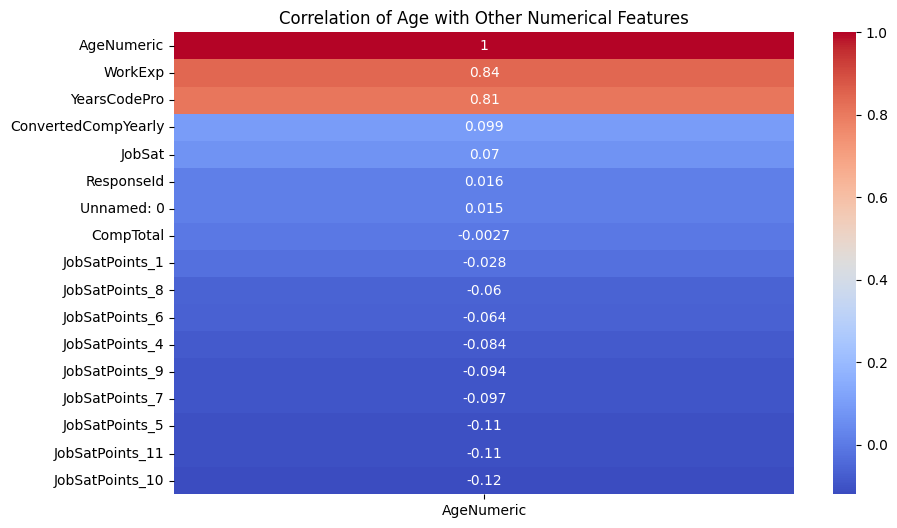

In [24]:
# Visualize Correlation Matrix

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['AgeNumeric']].sort_values(by='AgeNumeric', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Age with Other Numerical Features")
plt.show()

In [25]:
df.to_csv('./cleaned_survey_data3.csv', index=False)
print("File saved successfully !")

File saved successfully !
